In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

In [2]:
data = [[828, 920, 1234567, 1020, 1111],
            [824, 910, 2345612, 1090, 1234],
            [880, 900, 3456123, 1010, 1000],
            [870, 990, 2312123, 1001, 1122],
            [860, 980, 3223123, 1008, 1133],
            [850, 970, 2432123, 1100, 1221]]
data = np.float32(data)

In [3]:
data

array([[8.280000e+02, 9.200000e+02, 1.234567e+06, 1.020000e+03,
        1.111000e+03],
       [8.240000e+02, 9.100000e+02, 2.345612e+06, 1.090000e+03,
        1.234000e+03],
       [8.800000e+02, 9.000000e+02, 3.456123e+06, 1.010000e+03,
        1.000000e+03],
       [8.700000e+02, 9.900000e+02, 2.312123e+06, 1.001000e+03,
        1.122000e+03],
       [8.600000e+02, 9.800000e+02, 3.223123e+06, 1.008000e+03,
        1.133000e+03],
       [8.500000e+02, 9.700000e+02, 2.432123e+06, 1.100000e+03,
        1.221000e+03]], dtype=float32)

In [4]:
df = pd.DataFrame(data)
df.head(3)

,0,1,2,3,4
0,828.0,920.0,1234567.0,1020.0,1111.0
1,824.0,910.0,2345612.0,1090.0,1234.0
2,880.0,900.0,3456123.0,1010.0,1000.0


# 단위가 제각각임 -> 정규화

In [5]:
x = data[:,:-1]
y = data[:,[-1]]

In [6]:
x,y

(array([[8.280000e+02, 9.200000e+02, 1.234567e+06, 1.020000e+03],
        [8.240000e+02, 9.100000e+02, 2.345612e+06, 1.090000e+03],
        [8.800000e+02, 9.000000e+02, 3.456123e+06, 1.010000e+03],
        [8.700000e+02, 9.900000e+02, 2.312123e+06, 1.001000e+03],
        [8.600000e+02, 9.800000e+02, 3.223123e+06, 1.008000e+03],
        [8.500000e+02, 9.700000e+02, 2.432123e+06, 1.100000e+03]],
       dtype=float32),
 array([[1111.],
        [1234.],
        [1000.],
        [1122.],
        [1133.],
        [1221.]], dtype=float32))

In [7]:
scalerF = MinMaxScaler()
# x는 minmax스케일러로 정규화
x_dataN = scalerF.fit_transform(x)  

In [8]:
x_dataN

array([[0.0714283 , 0.22222233, 0.        , 0.19191933],
       [0.        , 0.11111164, 0.50012016, 0.89899063],
       [1.        , 0.        , 1.        , 0.09090996],
       [0.8214283 , 1.        , 0.48504567, 0.        ],
       [0.6428566 , 0.8888893 , 0.8951186 , 0.07070732],
       [0.4642849 , 0.7777777 , 0.5390618 , 1.        ]], dtype=float32)

data
```
[[828, 920, 1234567, 1020, 1111],
[824, 910, 2345612, 1090, 1234],
[880, 900, 3456123, 1010, 1000],
[870, 990, 2312123, 1001, 1122],
[860, 980, 3223123, 1008, 1133],
[850, 970, 2432123, 1100, 1221]]

각 피처별 0 ~ 1 사이 값으로

(x - 가장 작은 값)  
------------------------
(가장 큰값 - 가장 작은값)
```


In [9]:
scaleL  = MinMaxScaler()
# y는 minmax스케일러로 정규화
y_dataN = scaleL.fit_transform(y) 
y_dataN

array([[0.47435904],
       [1.0000005 ],
       [0.        ],
       [0.52136755],
       [0.56837654],
       [0.94444466]], dtype=float32)

In [10]:
dense = Dense(units =1 , input_dim = 4 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
h = model.fit(x_dataN,y_dataN ,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2019
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1437
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1135
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 13/1000
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 104/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 105/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 109/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 110/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 111/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 112/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 113/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 114/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 205/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 206/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 208/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 209/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 210/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 211/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 212/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 213/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 214/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 215/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 307/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 308/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 310/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 312/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 313/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 314/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 315/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 316/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 408/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 409/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 410/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 411/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 412/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 414/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 416/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 417/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 508/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 509/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 510/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 511/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 512/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 513/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 514/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 516/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 518/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 611/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 612/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 613/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 614/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 615/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 616/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 618/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 619/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 710/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 711/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 712/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 714/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 716/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 717/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 720/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 721/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 811/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 812/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 813/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 814/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 815/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 816/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 817/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 818/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 819/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 820/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 821/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 912/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 913/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 914/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 915/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 916/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 917/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 918/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 919/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 920/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 921/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 922/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 923/1000
1/1 [=======================

In [11]:
h.history.keys()

dict_keys(['loss'])

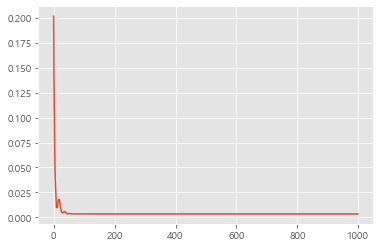

In [12]:
plt.plot(h.history['loss'])

In [13]:
w,b = model.get_weights()
w,b

(array([[-0.6086135 ],
        [ 0.46059248],
        [ 0.19812804],
        [ 0.43425247]], dtype=float32),
 array([0.3828296], dtype=float32))

1번째 행의 예측값   
[828, 920, 1234567, 1020]    
실제값 :  1111


```

model.predict(
    [[828, 920, 1234567, 1020]]
    
) matmul 형식을 맞춰야함
``` 

-> 이런 식으로 쓰면 안됨 ( 정규화 한 데이터가 아니기때문)


In [14]:
xn = scalerF.transform(
           [[828, 920, 1234567, 1020]]
)
result  = model.predict(xn)

In [15]:
result

array([[0.525053]], dtype=float32)

# 역정규화 

- 라벨은 굳이 정규화 할필요가 없는데
- 방금 같은 경우 했으니까 -> y 라벨에 대해 역정규화

In [16]:
scaleL.inverse_transform(result)

array([[1122.8623]], dtype=float32)

# 보스턴 데이터 셋 정규화 후 합습 하여 첫째 행 medv 예측

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

df_boston =pd.DataFrame(boston['data'],columns=boston['feature_names'])
df_boston['medv'] = boston['target']
x = df_boston.iloc[ :, : -1]
y = boston['target']
df_boston.head(3)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [18]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:
scalerF = MinMaxScaler()
x_dataN = scalerF.fit_transform(x)  

In [21]:
x_dataN.shape

(506, 13)

In [22]:
# Dense 1    13행 
dense = Dense(units =1 , input_dim = 13 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))   
h = model.fit(x_dataN,y ,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 412.4662
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 205.3674
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 138.7125
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 117.3750
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 101.1276
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 88.1802
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 77.9793
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 70.4033
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 64.7469
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 60.4121
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 57.3091
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 54.9254
Epoch 13

16/16 [==============================] - 0s 2ms/step - loss: 23.9310
Epoch 100/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.7202
Epoch 101/1000
16/16 [==============================] - 0s 1ms/step - loss: 23.6225
Epoch 102/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.5818
Epoch 103/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.6789
Epoch 104/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.4804
Epoch 105/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.5722
Epoch 106/1000
16/16 [==============================] - 0s 2ms/step - loss: 24.1646
Epoch 107/1000
16/16 [==============================] - 0s 1ms/step - loss: 23.7319
Epoch 108/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.5612
Epoch 109/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.3193
Epoch 110/1000
16/16 [==============================] - 0s 2ms/step - loss: 23.3454
Epoch 1

16/16 [==============================] - 0s 2ms/step - loss: 22.6438
Epoch 197/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.4916
Epoch 198/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2855
Epoch 199/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2567
Epoch 200/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2990
Epoch 201/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3310
Epoch 202/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3071
Epoch 203/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3415
Epoch 204/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2353
Epoch 205/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2661
Epoch 206/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2636
Epoch 207/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.4707
Epoch 2

16/16 [==============================] - 0s 2ms/step - loss: 22.2662
Epoch 294/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3079
Epoch 295/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.2393
Epoch 296/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0560
Epoch 297/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0439
Epoch 298/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0912
Epoch 299/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.1875
Epoch 300/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0805
Epoch 301/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0327
Epoch 302/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1199
Epoch 303/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1329
Epoch 304/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2667
Epoch 3

16/16 [==============================] - 0s 2ms/step - loss: 22.0117
Epoch 391/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0112
Epoch 392/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.4549
Epoch 393/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3754
Epoch 394/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1774
Epoch 395/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0659
Epoch 396/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1013
Epoch 397/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1197
Epoch 398/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2184
Epoch 399/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0835
Epoch 400/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2803
Epoch 401/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2874
Epoch 4

16/16 [==============================] - 0s 1ms/step - loss: 22.2292
Epoch 488/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.2355
Epoch 489/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1624
Epoch 490/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.1192
Epoch 491/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0726
Epoch 492/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1951
Epoch 493/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0695
Epoch 494/1000
16/16 [==============================] - 0s 1ms/step - loss: 21.9787
Epoch 495/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.0093
Epoch 496/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0472
Epoch 497/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2606
Epoch 498/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3530
Epoch 4

16/16 [==============================] - 0s 2ms/step - loss: 22.4377
Epoch 585/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.4397
Epoch 586/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0278
Epoch 587/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.5570
Epoch 588/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2043
Epoch 589/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.9943
Epoch 590/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1025
Epoch 591/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0960
Epoch 592/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.9988
Epoch 593/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0348
Epoch 594/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1560
Epoch 595/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2169
Epoch 5

16/16 [==============================] - 0s 2ms/step - loss: 22.1622
Epoch 682/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0575
Epoch 683/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.4651
Epoch 684/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2780
Epoch 685/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3365
Epoch 686/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3323
Epoch 687/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2342
Epoch 688/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0387
Epoch 689/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1001
Epoch 690/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2456
Epoch 691/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1904
Epoch 692/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.6005
Epoch 6

16/16 [==============================] - 0s 1ms/step - loss: 22.5048
Epoch 779/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.5426
Epoch 780/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2316
Epoch 781/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2659
Epoch 782/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2173
Epoch 783/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2135
Epoch 784/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1360
Epoch 785/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.1845
Epoch 786/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.0377
Epoch 787/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0373
Epoch 788/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2152
Epoch 789/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.9999
Epoch 7

16/16 [==============================] - 0s 2ms/step - loss: 21.8455
Epoch 876/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0131
Epoch 877/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2612
Epoch 878/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2890
Epoch 879/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2175
Epoch 880/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.9762
Epoch 881/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.2411
Epoch 882/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.2067
Epoch 883/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1218
Epoch 884/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1930
Epoch 885/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1963
Epoch 886/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1297
Epoch 8

16/16 [==============================] - 0s 1ms/step - loss: 22.2423
Epoch 973/1000
16/16 [==============================] - 0s 2ms/step - loss: 21.9999
Epoch 974/1000
16/16 [==============================] - 0s 1ms/step - loss: 22.0695
Epoch 975/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0517
Epoch 976/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.3726
Epoch 977/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1828
Epoch 978/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1094
Epoch 979/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1193
Epoch 980/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1245
Epoch 981/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1521
Epoch 982/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.1447
Epoch 983/1000
16/16 [==============================] - 0s 2ms/step - loss: 22.0384
Epoch 9

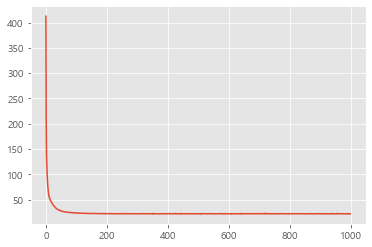

In [23]:
plt.plot(h.history['loss'])

In [24]:
w,b = model.get_weights()
w,b

(array([[-9.5868378e+00],
        [ 4.5741491e+00],
        [ 5.3074569e-01],
        [ 2.7653854e+00],
        [-8.6981316e+00],
        [ 1.9828209e+01],
        [ 4.8267338e-03],
        [-1.6220011e+01],
        [ 6.9892654e+00],
        [-6.4959750e+00],
        [-8.9676886e+00],
        [ 3.6166043e+00],
        [-1.9060583e+01]], dtype=float32),
 array([26.58231], dtype=float32))

In [25]:
np.array(x.iloc[:,0])

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [26]:
model.predict(x_dataN)[0]

array([29.771027], dtype=float32)

In [27]:
boston['data'][0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [28]:
np.array(boston['data'][0]).reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [29]:
xn = scalerF.transform( np.array(boston['data'][0]).reshape(1,-1)  )
xn
result  = model.predict(xn)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
result

array([[29.771027]], dtype=float32)

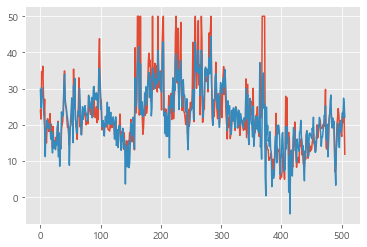

In [32]:
plt.plot(y)
plt.plot(model.predict(x_dataN))

# 과적합 판단


-> train test validation 